In [12]:
# https://scikit-learn.org/stable/modules/permutation_importance.html

In [13]:
!pip install -q scikit-optimize xgboost GPUtil
!wget -qO model_template.py https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/raw/refs/heads/main/src/egt309_pipeline/model_template.py
!wget -qO model_template_utils.py https://github.com/HigherGround189/EGT309-Team-Harish-Kanna/raw/refs/heads/main/src/egt309_pipeline/model_template_utils.py


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\ZX\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# Misc
RANDOM_STATE = 42

In [15]:
import GPUtil
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, train_test_split

In [16]:
import os

path = os.getcwd()

In [17]:
f"../{path}"

'../c:\\Module\\AI_Solution_Development\\EGT309-Team-Harish-Kanna\\notebooks'

In [18]:
import joblib

In [19]:
model = joblib.load(
    "c:/Module/AI_Solution_Development/EGT309-Team-Harish-Kanna/data/06_models/RandomForestClassifier/RandomForestClassifier.pkl"
)

In [20]:
X_test = pd.read_pickle(
    "c:/Module/AI_Solution_Development/EGT309-Team-Harish-Kanna/data/05_model_input/X_test.pkl"
)
y_test = pd.read_pickle(
    "c:/Module/AI_Solution_Development/EGT309-Team-Harish-Kanna/data/05_model_input/Y_test.pkl"
)
X_train = pd.read_pickle(
    "c:/Module/AI_Solution_Development/EGT309-Team-Harish-Kanna/data/05_model_input/X_train.pkl"
)
y_train = pd.read_pickle(
    "c:/Module/AI_Solution_Development/EGT309-Team-Harish-Kanna/data/05_model_input/Y_train.pkl"
)

In [21]:
import numpy as np

In [22]:
print(y_train.shape)

(32629,)


In [23]:
y_proba = model.predict_proba(X_train)

c:\Module\AI_Solution_Development\EGT309-Team-Harish-Kanna\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.model_selection import cross_val_predict

y_proba = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")

In [40]:
y_scores

array([0.37650149, 0.34832472, 0.2935113 , ..., 0.50278393, 0.44595083,
       0.86957529], shape=(32629,))

In [42]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba[:, 1])

In [54]:
best_index = np.where(recalls[:-1] >= 0.9)[0][-1]

In [55]:
thresholds[best_index]

np.float64(0.25791727219633015)

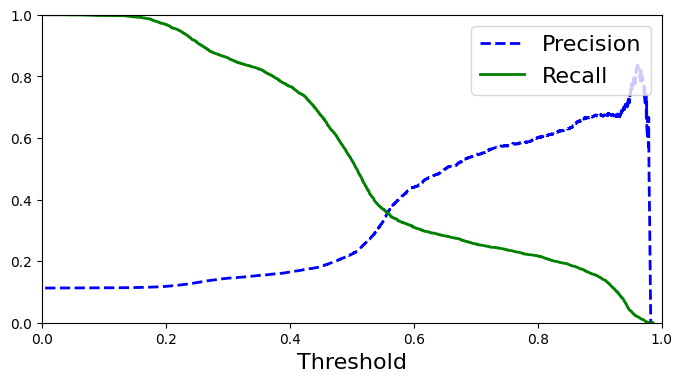

In [43]:
def plot_precision_recall_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper right", fontsize=16)
    plt.xlim([0, 1])
    plt.ylim([0, 1])


plt.figure(figsize=(8, 4))
plot_precision_recall_curve(precisions, recalls, thresholds)
plt.show()

In [56]:
y_train_pred = y_proba[:, 1] > thresholds[best_index]

In [57]:
from sklearn.metrics import recall_score

recall_score(y_train, y_train_pred)

0.8998639455782312

In [37]:
y_probs = model.predict_proba(X_test)[:, 1]

c:\Module\AI_Solution_Development\EGT309-Team-Harish-Kanna\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

# Print the matrix to see raw counts of caught subscribers
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_new))
# Calculate and print the precision for the positive class (1)
print("Precision:", precision_score(y_test, y_pred_new))
# Print metrics to check Recall (sensitivity) and Precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred_new))

Confusion Matrix:
[[7205   34]
 [ 849   70]]
Precision: 0.6730769230769231

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94      7239
        True       0.67      0.08      0.14       919

    accuracy                           0.89      8158
   macro avg       0.78      0.54      0.54      8158
weighted avg       0.87      0.89      0.85      8158



In [4]:
device = "cuda" if GPUtil.getAvailable() else "cpu"

# Data splitting

In [5]:
!gdown --fuzzy https://drive.google.com/file/d/17qgFjTIUgxsiURgGjVC6WlEFn6Wl-OeJ/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=17qgFjTIUgxsiURgGjVC6WlEFn6Wl-OeJ
To: /content/cleaned_bmarket.csv
100% 2.65M/2.65M [00:00<00:00, 62.4MB/s]


In [6]:
df = pd.read_csv("./cleaned_bmarket.csv")

In [7]:
y = df["Subscription Status"]
X = df.drop("Subscription Status", axis=1)

X = pd.get_dummies(X, drop_first=True)  # PLEASE rememeber to research label encoder >.<

In [8]:
print(X.shape, y.shape)

(40787, 26) (40787,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

In [ ]:
print(X_train.shape, y_train.shape)

(32629, 26) (32629,)


# Misc

In [10]:
from skopt.space import Categorical, Integer, Real

In [11]:
###################
# Hyperparameters #
###################

# Random Forest: {
rf_params = {
    "n_jobs": 1,
    "oob_score": True,
    "warm_start": False,
    "random_state": RANDOM_STATE,
}

# rf_gs_params = {
#     "max_features": ["log2"],
#     "min_samples_split": [2, 5, 10],
#     'max_samples': [0.75, None,],
#     "class_weight": ["balanced", None],
#     "max_depth": [20, None],
#     "n_estimators": [1500, 2000],
# }

rf_bayes_params = {
    "max_features": Categorical(["sqrt", "log2"]),
    "min_samples_split": Integer(2, 25),
    "max_samples": Real(0.5, 1.0),
    "class_weight": Categorical(["balanced", None]),
    "max_depth": Integer(10, 300),
    "n_estimators": Integer(200, 1000),
}
# }

# Ensemble models

### Random Forest

**Optimization Methods**


*   Grid Search
*   Adjusting decision threshold

Only boosting trees plot training and validation loss


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

In [14]:
rf_ens = ModelWrapper(
    title="RandomForestClassifier",
    model=RandomForestClassifier,
    hyperparameters={**rf_params},
    param_grid={**rf_bayes_params},
    cv=cv_strategy,
    n_iterations=5,
)

In [15]:
clfs = [rf_ens]

In [16]:
for model in clfs:
    model.run_bayessearch(X_train, y_train)
    model.write_info_to_disk(X_test, y_test, "/content")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [17]:
pd.read_csv("./RandomForestClassifier/test_error.csv")

,Unnamed: 0,test
0,accuracy,0.835744
1,precision,0.308113
2,recall,0.367791
3,f1,0.335317


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = rf_ens.best_model.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_pred_proba)
auc_score = roc_auc_score(y, y_pred_proba)

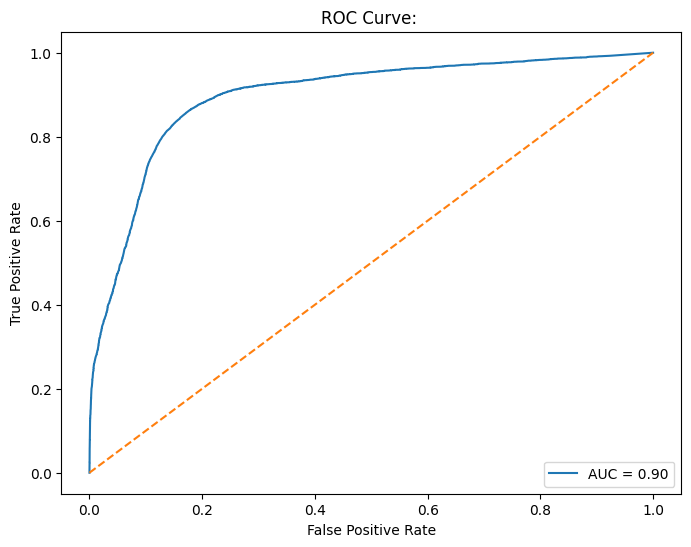

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: ")
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = rf_ens.best_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.88      0.90      7239
        True       0.31      0.43      0.36       919

    accuracy                           0.83      8158
   macro avg       0.62      0.66      0.63      8158
weighted avg       0.86      0.83      0.84      8158



## XGBoost